C:\Users\borka\AppData\Local\Temp\ipykernel_10216\1788993362.py:4: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\borka\Downloads\all_data.csv', sep=";")


        Age  Num_Credit_Card
0        23                4
1        24                4
2        24                4
4        28                4
5        28                4
...     ...              ...
149995   25                6
149996   25                6
149997   25                6
149998   25                6
149999   25                6

[142584 rows x 2 columns]
Correlation Matrix:
                      Age  Num_Credit_Card
Age              1.000000         0.000566
Num_Credit_Card  0.000566         1.000000


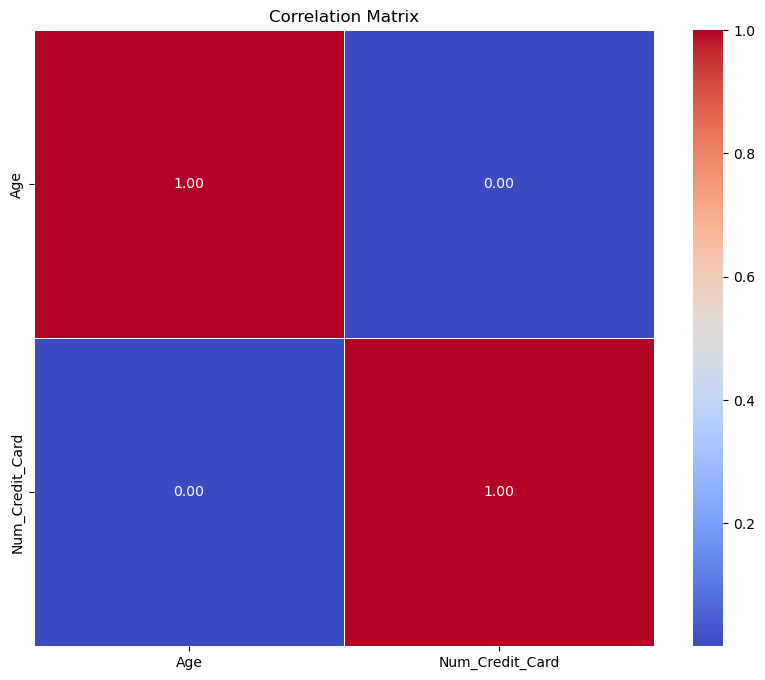

In [35]:
import pandas as pd

#replace <path on you computer to file, e.g. C:\....> with the path to the file 
df = pd.read_csv(r'C:\Users\borka\Downloads\all_data.csv', sep=";")  

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

df['Age'].fillna(-1, inplace=True)
df['Age'] = df['Age'].astype(int, errors='ignore')

# Filter rows where 'Age' is a valid integer
df_valid_age = df[df['Age'].astype(str).str.isdigit()]

# Specify the columns you want to include in the correlation matrix
df = df.loc[df['Age'] != -1]

selected_columns = ['Age', 'Num_Credit_Card']
print(df[selected_columns])
# Calculate the correlation matrix for the selected columns
correlation_matrix = df[selected_columns].corr()
# Print or display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Int64Index([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
            31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
            48, 49, 50, 51, 52, 53, 54, 55, 56],
           dtype='int64') [1310 2232 2109 2158 3066 3927 3977 3854 4063 3750 3871 4062 4140 4089
 4173 3943 3943 4071 4189 3709 3943 4130 4038 4002 4099 4198 3673 3976
 3718 3798 4116 3709 2665 1789 1923 1951 1858 1834 1876 1944 1859 1946
  846]
<class 'pandas.core.series.Series'>


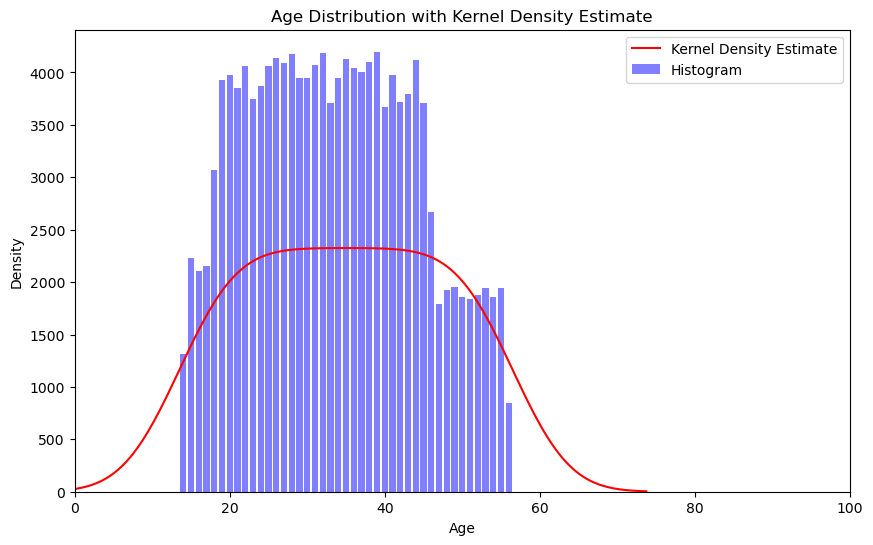

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as norm
import numpy as np

def age_distribution(file_path, separator=';'):
    # Read the CSV file into a DataFrame with low_memory=False to suppress the warning
    df = pd.read_csv(file_path, sep=separator, low_memory=False)

    # Extract the "Age" column and filter out non-integer values and values over 100
    age_column = df['Age']

    age_column_filtered = age_column.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna().astype(int) #filters non int values in the table
    age_column_filtered = age_column_filtered[age_column_filtered <= 90] #limit the age from 0 to 90 because of incorrect values in the table
    age_column_filtered = age_column_filtered[age_column_filtered > 0]

    # Count the frequencies of each unique integer value in the "Age" column
    age_counts = age_column_filtered.value_counts().sort_index()

    return age_counts

csv_file_path = r'C:\Users\borka\Downloads\all_data.csv'

# Call the age_distribution function with semicolon separator
age_distribution_result = age_distribution(csv_file_path, separator=';')

#print(age_distribution_result.index, age_distribution_result.values) prints the values of the series
#print(type(age_distribution_result)) 

plt.figure(figsize=(10, 6))

# Plot the histogram and density curve
plt.bar(age_distribution_result.index, age_distribution_result.values, color='blue', alpha=0.5, label='Histogram')
sns.kdeplot(age_distribution_result.index, color='red', label='Kernel Density Estimate')
plt.gca().lines[0].set_ydata(plt.gca().lines[0].get_ydata() * 100000) #scale the y factor of the curve to appear next to the absolute values of the histogram

#you can leave only sns.kdeplot function out of the top 3 lines and have only the distribution curve

plt.xlim(0, 100)
plt.title('Age Distribution with Kernel Density Estimate')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()  # Display legend for better clarity
plt.show()


In [202]:
import pandas as pd

def count_missing_and_incorrect_values(file_path, separator=';'):
    try:
        # Read the CSV file into a DataFrame, handling errors by skipping problematic lines
        df = pd.read_csv(file_path, sep=separator, on_bad_lines='skip')

        # Count the number of missing values in each column
        missing_values_count = df.isnull().sum()

        # Count the number of incorrect values in each column
        incorrect_values_count = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

        # Combine the results into a DataFrame
        result_df = pd.DataFrame({
            'Missing_Values': missing_values_count,
            'Incorrect_Values': incorrect_values_count
        })

        #fixes the columns where the prodominant type is string
        for i in range(0, 28):
            col_to_modify = df.columns[i]
            if incorrect_values_count[col_to_modify] > len(df[col_to_modify]) / 2:
                result_df.at[col_to_modify, 'Incorrect_Values'] = len(df[col_to_modify]) - incorrect_values_count[col_to_modify]
            
        return result_df

    except Exception as e:
        print(f"Error reading CSV file: {e}")

# Example CSV file path with semicolon separator
csv_file_path = r'C:\Users\borka\Downloads\all_data.csv'

# Call the count_missing_and_incorrect_values function with semicolon separator
result_df = count_missing_and_incorrect_values(csv_file_path, separator=';')

# Display the result
print("Statistics on Missing and Incorrect Values in Each Column:")
print(result_df)


C:\Users\borka\AppData\Local\Temp\ipykernel_14056\2612315236.py:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=separator, on_bad_lines='skip')


Statistics on Missing and Incorrect Values in Each Column:
                          Missing_Values  Incorrect_Values
ID                                     0                 0
Customer_ID                            0                 0
Month                                  0                 0
Name                               15000                 0
Age                                    0              7416
SSN                                    0                 0
Occupation                             0                 0
Annual_Income                          0              3627
Monthly_Inhand_Salary              22500               259
Num_Bank_Accounts                      0                 0
Num_Credit_Card                        0                 0
Interest_Rate                          0                 0
Num_of_Loan                            0              7221
Type_of_Loan                       17112                 0
Delay_from_due_date                    0                